In [1]:
import sys
sys.path.append("../../")
import helper
from pandas import read_excel,DataFrame,melt,merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [13]:
origin=read_excel('공모전 및 프로젝트 엑셀파일/주택의_종류_및_노후기간별_주택__시군구_2022년기준.xlsx')
origin.head()

,행정구역별(시군구),20년~30년미만_계,20년~30년미만_단독주택,20년~30년미만_아파트,20년~30년미만_연립주택,20년~30년미만_다세대주택,20년~30년미만_비거주용 건물내 주택,30년이상_계,30년 이상_단독주택,30년 이상_아파트,30년 이상_연립주택,30년 이상_다세대주택,30년 이상_비거주용 건물내 주택
0,소계,897042,76125,573216,45344,196307,6050,732831,188536,373526,47065,108453,15251
1,종로구,16931,2045,5501,2269,6903,213,13873,8576,1209,2558,1050,480
2,중구,17345,1103,11919,1198,2938,187,7815,4299,1691,502,825,498
3,용산구,22494,2618,13504,1763,4506,103,23894,10147,8422,1084,3786,455
4,성동구,34943,2238,28966,338,3216,185,16687,6738,6729,1417,1156,647


In [14]:
origin.isna().sum()

행정구역별(시군구)               0
20년~30년미만_계              0
20년~30년미만_단독주택           0
20년~30년미만_아파트            0
20년~30년미만_연립주택           0
20년~30년미만_다세대주택          0
20년~30년미만_비거주용 건물내 주택    0
30년이상_계                  0
30년 이상_단독주택              0
30년 이상_아파트               0
30년 이상_연립주택              0
30년 이상_다세대주택             0
30년 이상_비거주용 건물내 주택       0
dtype: int64

In [15]:
df=origin.copy()
df.head()

,행정구역별(시군구),20년~30년미만_계,20년~30년미만_단독주택,20년~30년미만_아파트,20년~30년미만_연립주택,20년~30년미만_다세대주택,20년~30년미만_비거주용 건물내 주택,30년이상_계,30년 이상_단독주택,30년 이상_아파트,30년 이상_연립주택,30년 이상_다세대주택,30년 이상_비거주용 건물내 주택
0,소계,897042,76125,573216,45344,196307,6050,732831,188536,373526,47065,108453,15251
1,종로구,16931,2045,5501,2269,6903,213,13873,8576,1209,2558,1050,480
2,중구,17345,1103,11919,1198,2938,187,7815,4299,1691,502,825,498
3,용산구,22494,2618,13504,1763,4506,103,23894,10147,8422,1084,3786,455
4,성동구,34943,2238,28966,338,3216,185,16687,6738,6729,1417,1156,647


In [16]:
df.drop(0,inplace=True)
df.head()

,행정구역별(시군구),20년~30년미만_계,20년~30년미만_단독주택,20년~30년미만_아파트,20년~30년미만_연립주택,20년~30년미만_다세대주택,20년~30년미만_비거주용 건물내 주택,30년이상_계,30년 이상_단독주택,30년 이상_아파트,30년 이상_연립주택,30년 이상_다세대주택,30년 이상_비거주용 건물내 주택
1,종로구,16931,2045,5501,2269,6903,213,13873,8576,1209,2558,1050,480
2,중구,17345,1103,11919,1198,2938,187,7815,4299,1691,502,825,498
3,용산구,22494,2618,13504,1763,4506,103,23894,10147,8422,1084,3786,455
4,성동구,34943,2238,28966,338,3216,185,16687,6738,6729,1417,1156,647
5,광진구,29696,4720,15765,1713,7203,295,20229,8183,6970,1794,2438,844


In [22]:
df_total=df.filter(['행정구역별(시군구)','20년~30년미만_계','30년이상_계'])
df_total.head()

,행정구역별(시군구),20년~30년미만_계,30년이상_계
1,종로구,16931,13873
2,중구,17345,7815
3,용산구,22494,23894
4,성동구,34943,16687
5,광진구,29696,20229


In [23]:
# melt함수 이용해서 데이터 재정렬 진행

df_total=df_total.melt(id_vars='행정구역별(시군구)',var_name='항목',value_name='수치')
df_total

,행정구역별(시군구),항목,수치
0,종로구,20년~30년미만_계,16931
1,중구,20년~30년미만_계,17345
2,용산구,20년~30년미만_계,22494
3,성동구,20년~30년미만_계,34943
4,광진구,20년~30년미만_계,29696
5,동대문구,20년~30년미만_계,27842
6,중랑구,20년~30년미만_계,38841
7,성북구,20년~30년미만_계,36258
8,강북구,20년~30년미만_계,24765
9,도봉구,20년~30년미만_계,36864


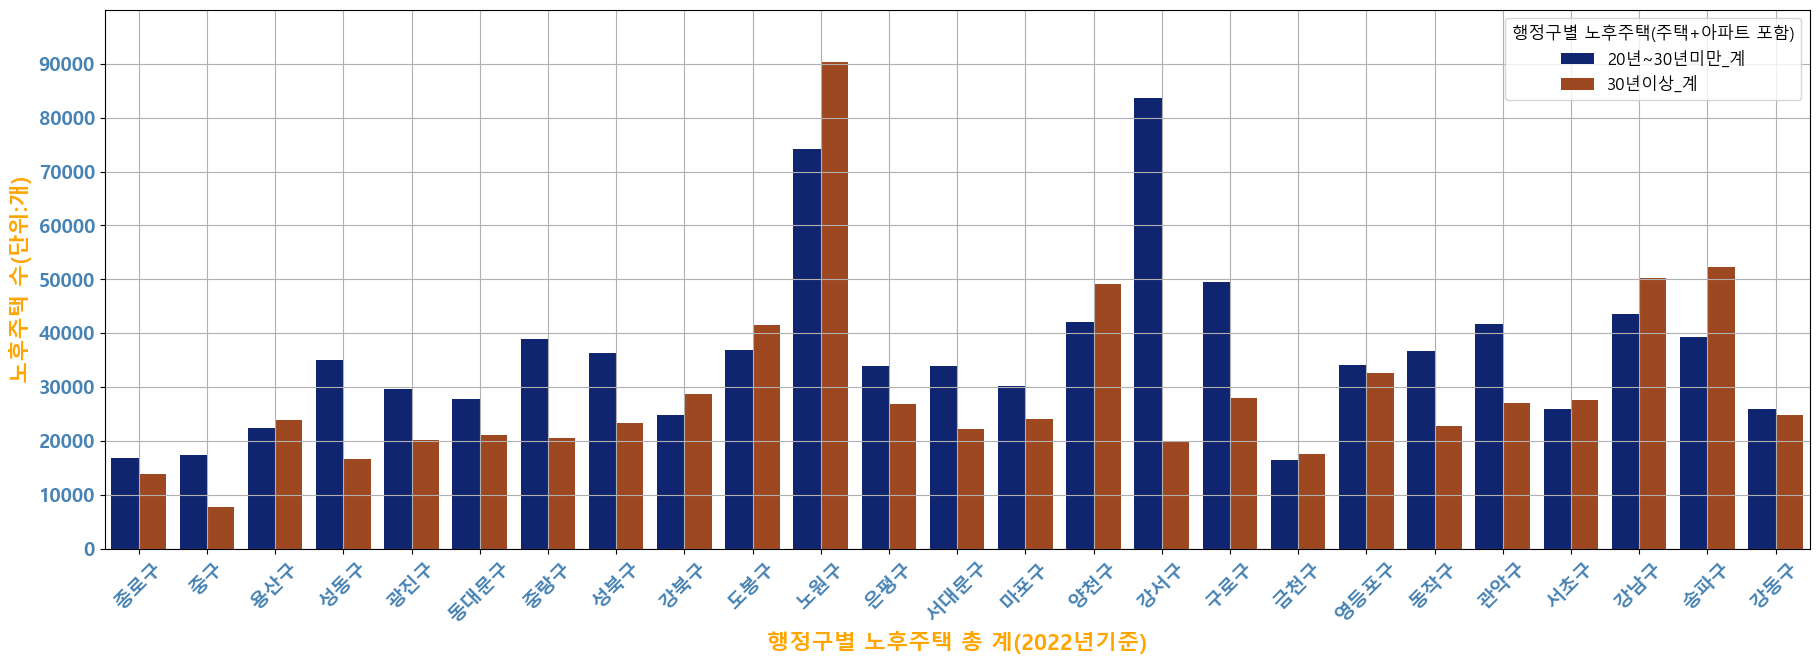

In [67]:
plt.figure(figsize=(22,7))
sb.barplot(data=df_total, x='행정구역별(시군구)', y='수치', hue='항목',palette='dark')
plt.xticks(fontsize=14,color="steelblue",fontweight='bold',rotation=45)
plt.xlabel('행정구별 노후주택 총 계(2022년기준)',fontweight='bold',fontsize=16,color='orange')
plt.ylabel('노후주택 수(단위:개)',fontweight='bold',fontsize=16,color='orange')
plt.yticks(fontsize=14,color="steelblue",fontweight='bold')
plt.ylim(0,100000)
plt.yticks(np.arange(0, 100000, 10000))  # y축 눈금 위치 설정 (10000 간격)
plt.grid()
plt.legend(title="행정구별 노후주택(주택+아파트 포함)",loc='upper right',bbox_to_anchor=(1.0,1.0))
plt.show()
plt.close()

행정구별 노후주택을 그래프로 확인한 결과 20-30년미만 노후 주택 총 계는 강서구, 노원구, 구로구 순으로 나타났다

그리고 30년이상된 노후주택 총 계는 노원구, 송파구, 강남구 순으로 나타났다. 

결론: 노후주택은 노원구,강서구 쪽이 많음(강남,송파 제외) 이쪽으로 방향을 잡아야할지?